In [1]:
import pandas as pd
import auxiliary as aux
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Load data

In [24]:
# Load the data
df = pd.read_csv('df_monthly.csv', sep=';')
df_log = pd.read_csv('df_monthly_log.csv', sep=';')

In [25]:
# Check shape
print(df.shape)
print(df_log.shape)

(6410, 228)
(6410, 228)


# Correlation analysis

### Raw

In [28]:
# Show correlations of raw variables
raw_corr = aux.get_correlations(df)
raw_corr.loc[~(raw_corr['FEATURE_1'].str.contains('location') | raw_corr['FEATURE_2'].str.contains('location') | raw_corr['FEATURE_1'].str.contains('date') | raw_corr['FEATURE_2'].str.contains('date'))].head(20)

,FEATURE_1,FEATURE_2,CORRELATION
463,median_age,life_expectancy,0.845557
918,total_deaths,total_cases,0.831948
7,gdp_per_capita,life_expectancy,0.668901
2,gdp_per_capita,median_age,0.639313
2291,new_deaths,new_tests,0.572253
1836,population,new_vaccinations,0.516698
235,cardiovasc_death_rate,life_expectancy,-0.476702
1,gdp_per_capita,cardiovasc_death_rate,-0.470717
922,total_deaths,new_deaths,0.470574
923,total_deaths,new_tests,0.416723


### Log

In [29]:
# Show correlations of log variables
log_corr = aux.get_correlations(df_log)
log_corr.loc[~(log_corr['FEATURE_1'].str.contains('location') | log_corr['FEATURE_2'].str.contains('location') | log_corr['FEATURE_1'].str.contains('date') | log_corr['FEATURE_2'].str.contains('date'))].head(20)

,FEATURE_1,FEATURE_2,CORRELATION
918,total_deaths,total_cases,0.931228
2062,new_cases,new_deaths,0.866290
463,median_age,life_expectancy,0.845557
7,gdp_per_capita,life_expectancy,0.828582
2,gdp_per_capita,median_age,0.818840
1377,total_cases,new_cases,0.670745
922,total_deaths,new_deaths,0.669699
921,total_deaths,new_cases,0.642339
1378,total_cases,new_deaths,0.588066
920,total_deaths,population,0.554768


### Dependent variable

In [30]:
# Show correlations with dependent variable for raw variables
raw_corr.loc[(raw_corr['FEATURE_1'] == 'new_deaths') | (raw_corr['FEATURE_2'] == 'new_deaths'), :].head(20)

,FEATURE_1,FEATURE_2,CORRELATION
2291,new_deaths,new_tests,0.572253
922,total_deaths,new_deaths,0.470574
2499,new_deaths,location_United States,0.455143
2062,new_cases,new_deaths,0.378132
1378,total_cases,new_deaths,0.367693
1834,population,new_deaths,0.295776
2351,new_deaths,location_Brazil,0.277574
2402,new_deaths,location_India,0.206154
2292,new_deaths,new_vaccinations,0.174670
2463,new_deaths,location_Russia,0.150170


In [31]:
# Show correlations with dependent variable for log variables
log_corr.loc[(log_corr['FEATURE_1'] == 'new_deaths') | (log_corr['FEATURE_2'] == 'new_deaths'), :].head(20)

,FEATURE_1,FEATURE_2,CORRELATION
2062,new_cases,new_deaths,0.866290
922,total_deaths,new_deaths,0.669699
1378,total_cases,new_deaths,0.588066
2291,new_deaths,new_tests,0.497053
2292,new_deaths,new_vaccinations,0.466476
1834,population,new_deaths,0.465427
466,median_age,new_deaths,0.443150
1606,life_expectancy,new_deaths,0.411621
10,gdp_per_capita,new_deaths,0.374485
2499,new_deaths,location_United States,0.174043


In [38]:
# Define the main independent variables
indep_vars = [col for col in df.columns if ('location' not in col) and ('date' not in col)]
indep_vars.remove('new_deaths')
log_vars = ['gdp_per_capita', 'total_deaths', 'population_density', 'total_cases', 'population', 'new_cases', 'new_tests', 'new_vaccinations']

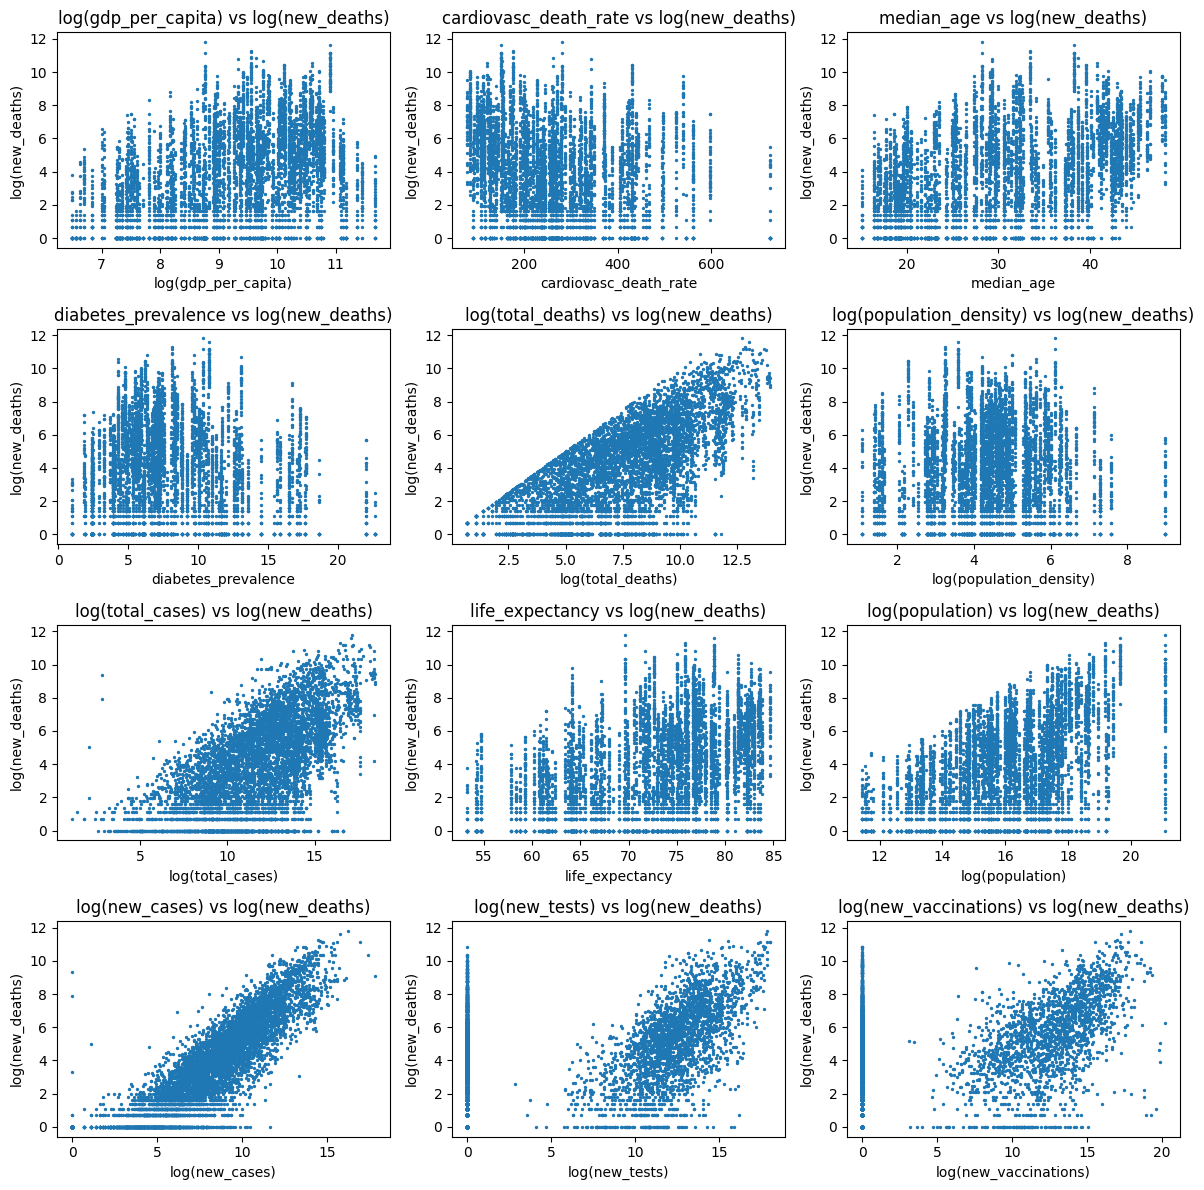

In [43]:
# Plot scatters with dependent variable
nrows, ncols = 4, 3
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,12))
ax = ax.flatten()
for idx, col in enumerate(indep_vars):
    df_log.plot(col, 'new_deaths', title=f'{"log(" if col in log_vars else ""}{col}{")" if col in log_vars else ""} vs log(new_deaths)', ax=ax[idx], kind='scatter', s=2, xlabel=f'{"log(" if col in log_vars else ""}{col}{")" if col in log_vars else ""}', ylabel='log(new_deaths)')

# Hide empty plots
for idx_plot in range(len(indep_vars), nrows * ncols):
    ax[idx_plot].set_visible(False)

# Increase spacing between plots
fig.tight_layout()

# Linear regression

### Raw variables 

                            OLS Regression Results                            
Dep. Variable:             new_deaths   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     417.3
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        22:03:58   Log-Likelihood:                -61624.
No. Observations:                6410   AIC:                         1.233e+05
Df Residuals:                    6397   BIC:                         1.234e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    32.26

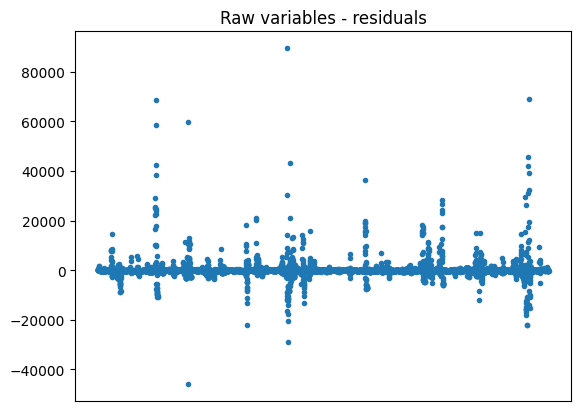

In [90]:
# Raw variables
raw_model = aux.OLS(df, 'new_deaths', indep_vars, plot_title='Raw variables - residuals')

In [94]:
# Calculate RMSE
print(f'RMSE: {np.sqrt((raw_model.resid ** 2).mean()):.2f}')

RMSE: 3622.11


### Log variables 

                            OLS Regression Results                            
Dep. Variable:             new_deaths   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     2934.
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        22:07:19   Log-Likelihood:                -9547.4
No. Observations:                6410   AIC:                         1.912e+04
Df Residuals:                    6397   BIC:                         1.921e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.59

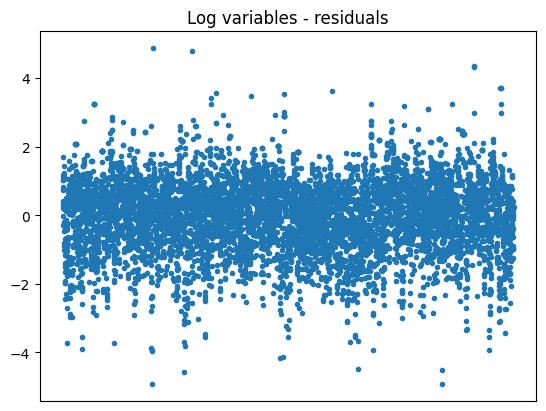

In [95]:
# Log variables
log_model = aux.OLS(df_log, 'new_deaths', indep_vars, plot_title='Log variables - residuals')

In [96]:
# Calculate RMSE
log_rmse = np.sqrt(((np.exp(log_model.predict(sm.add_constant(df_log.loc[:, indep_vars]))) - df['new_deaths']) ** 2).mean())
print(f'RMSE: {log_rmse:.2f}')

RMSE: 3561.01


### Country and month dummies (raw)

                            OLS Regression Results                            
Dep. Variable:             new_deaths   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     38.67
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        22:10:20   Log-Likelihood:                -60705.
No. Observations:                6410   AIC:                         1.219e+05
Df Residuals:                    6189   BIC:                         1.233e+05
Df Model:                         220                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

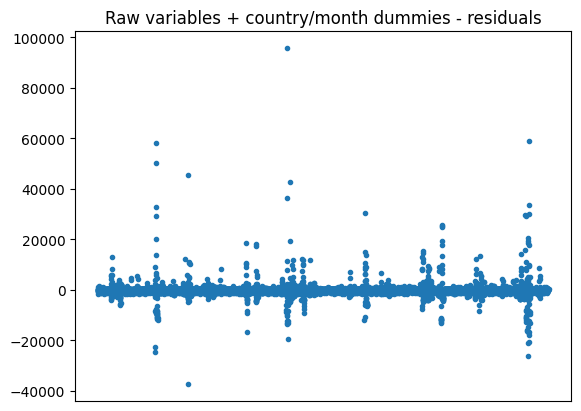

In [97]:
# Raw variables with country and month dummies
indep_vars_all = list(df.columns)
indep_vars_all.remove('new_deaths')
raw_dummy_model = aux.OLS(df, 'new_deaths', indep_vars_all, plot_title='Raw variables + country/month dummies - residuals')

In [98]:
# Calculate RMSE
print(f'RMSE: {np.sqrt((raw_dummy_model.resid ** 2).mean()):.2f}')

RMSE: 3138.42


### Country and month dummies (log)

                            OLS Regression Results                            
Dep. Variable:             new_deaths   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     245.5
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        22:10:59   Log-Likelihood:                -8257.0
No. Observations:                6410   AIC:                         1.696e+04
Df Residuals:                    6189   BIC:                         1.845e+04
Df Model:                         220                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

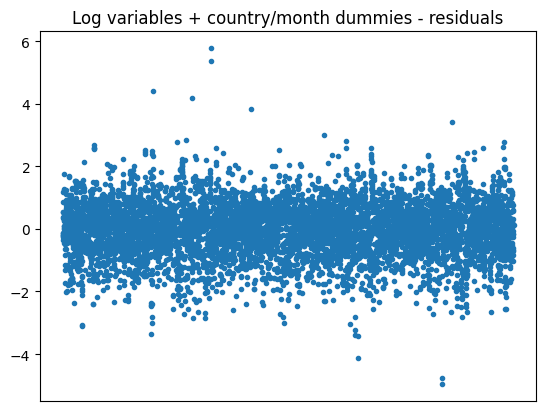

In [99]:
# Raw variables with country and month dummies
log_dummy_model = aux.OLS(df_log, 'new_deaths', indep_vars_all, plot_title='Log variables + country/month dummies - residuals')

In [100]:
# Calculate RMSE
log_dummy_rmse = np.sqrt(((np.exp(log_dummy_model.predict(sm.add_constant(df_log.loc[:, indep_vars_all]))) - df['new_deaths']) ** 2).mean())
print(f'RMSE: {log_dummy_rmse:.2f}')

RMSE: 2195.68


# Predictive analysis

### Split data

In [59]:
# Load packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [60]:
# Split data

# Raw
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, indep_vars_all], df['new_deaths'], train_size=0.8,  random_state=42)

# Log
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(df_log.loc[:, indep_vars_all], df_log['new_deaths'], train_size=0.8,  random_state=42)

In [61]:
# Initiate a dictionary for the metric results
results = {}

In [62]:
# Define a function performing a grid search for a given classifier
def grid_search(classifier, params, log=False):
    # Fit the grid search
    model = GridSearchCV(classifier, params, scoring='neg_mean_squared_error', cv=3, verbose=4) #njobs3
    if log:
        model.fit(X_train_log, y_train_log)
    else:
        model.fit(X_train, y_train)

    # Evaluate on the test set
    print(f'Best parameters: {model.best_params_}')
    if log:
        test_set_MSE = mean_squared_error(np.exp(y_test_log), np.exp(model.best_estimator_.predict(X_test_log)))
    else:
        test_set_MSE = mean_squared_error(y_test, model.best_estimator_.predict(X_test))
    print(f'Test set MSE: {test_set_MSE:,.2f}'.replace(',', ' '))

    # Return search results
    return model.cv_results_, test_set_MSE

### Linear regression

In [64]:
from sklearn.linear_model import LinearRegression

# Estimate the model
model = LinearRegression()
model.fit(X_train, y_train)

# Score the model
results['OLS'] = mean_squared_error(y_test, model.predict(X_test))
print(f'MSE: {results["OLS"]:,.2f}'.replace(',', ' '))

MSE: 12 933 271.47


In [65]:
from sklearn.linear_model import LinearRegression

# Estimate the model (log)
model = LinearRegression()
model.fit(X_train_log, y_train_log)

# Score the model
results['OLS (log)'] = mean_squared_error(np.exp(y_test_log), np.exp(model.predict(X_test_log)))
print(f'MSE: {results["OLS (log)"]:,.2f}'.replace(',', ' '))

MSE: 4 527 768.65


### Ridge

In [66]:
from sklearn.linear_model import Ridge

# Perform grid search
model = Pipeline([('scaler', StandardScaler()), ('model', Ridge())])
params = {'model__alpha':[0.5, 1, 5, 10, 100, 200, 500]}
grid_res, MSE = grid_search(model, params)
results['Ridge'] = MSE

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV 1/3] END ...........model__alpha=0.5;, score=-8730525.054 total time=   0.0s
[CV 2/3] END ...........model__alpha=0.5;, score=-6934860.030 total time=   0.0s
[CV 3/3] END ..........model__alpha=0.5;, score=-16251029.939 total time=   0.0s
[CV 1/3] END .............model__alpha=1;, score=-8731081.341 total time=   0.0s
[CV 2/3] END .............model__alpha=1;, score=-6934042.763 total time=   0.0s
[CV 3/3] END ............model__alpha=1;, score=-16250801.499 total time=   0.0s
[CV 1/3] END .............model__alpha=5;, score=-8735511.770 total time=   0.0s
[CV 2/3] END .............model__alpha=5;, score=-6927922.047 total time=   0.0s
[CV 3/3] END ............model__alpha=5;, score=-16249274.793 total time=   0.0s
[CV 1/3] END ............model__alpha=10;, score=-8740978.518 total time=   0.0s
[CV 2/3] END ............model__alpha=10;, score=-6921228.946 total time=   0.0s
[CV 3/3] END ...........model__alpha=10;, score=-

In [67]:
from sklearn.linear_model import Ridge

# Perform grid search (log)
model = Pipeline([('scaler', StandardScaler()), ('model', Ridge())])
params = {'model__alpha':[0, 0.5, 1, 5, 10, 100, 200, 500]}
grid_res, MSE = grid_search(model, params, True)
results['Ridge (log)'] = MSE

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END ...................model__alpha=0;, score=-0.918 total time=   0.0s
[CV 2/3] END ...................model__alpha=0;, score=-0.841 total time=   0.0s
[CV 3/3] END ...................model__alpha=0;, score=-0.836 total time=   0.0s
[CV 1/3] END .................model__alpha=0.5;, score=-0.908 total time=   0.0s
[CV 2/3] END .................model__alpha=0.5;, score=-0.825 total time=   0.0s
[CV 3/3] END .................model__alpha=0.5;, score=-0.838 total time=   0.0s
[CV 1/3] END ...................model__alpha=1;, score=-0.908 total time=   0.0s
[CV 2/3] END ...................model__alpha=1;, score=-0.825 total time=   0.0s
[CV 3/3] END ...................model__alpha=1;, score=-0.837 total time=   0.0s
[CV 1/3] END ...................model__alpha=5;, score=-0.908 total time=   0.0s
[CV 2/3] END ...................model__alpha=5;, score=-0.825 total time=   0.0s
[CV 3/3] END ...................model__alpha=5;, 

### Lasso

In [68]:
from sklearn.linear_model import Lasso

# Perform grid search
model = Pipeline([('scaler', StandardScaler()), ('model', Lasso())])
params = {'model__alpha':[0.5, 1, 5, 10, 100, 200, 500]}
grid_res, MSE = grid_search(model, params)
results['Lasso'] = MSE

Fitting 3 folds for each of 7 candidates, totalling 21 fits


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.985e+08, tolerance: 7.814e+06
  model = cd_fast.enet_coordinate_descent(


[CV 1/3] END ...........model__alpha=0.5;, score=-8730980.947 total time=   0.3s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.611e+07, tolerance: 8.769e+06
  model = cd_fast.enet_coordinate_descent(


[CV 2/3] END ...........model__alpha=0.5;, score=-6930380.436 total time=   0.3s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.235e+07, tolerance: 5.864e+06
  model = cd_fast.enet_coordinate_descent(


[CV 3/3] END ..........model__alpha=0.5;, score=-16251334.027 total time=   0.3s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.387e+08, tolerance: 7.814e+06
  model = cd_fast.enet_coordinate_descent(


[CV 1/3] END .............model__alpha=1;, score=-8732530.757 total time=   0.3s
[CV 2/3] END .............model__alpha=1;, score=-6927931.713 total time=   0.2s
[CV 3/3] END ............model__alpha=1;, score=-16250889.816 total time=   0.3s
[CV 1/3] END .............model__alpha=5;, score=-8744299.201 total time=   0.2s
[CV 2/3] END .............model__alpha=5;, score=-6909344.327 total time=   0.1s
[CV 3/3] END ............model__alpha=5;, score=-16248621.858 total time=   0.1s
[CV 1/3] END ............model__alpha=10;, score=-8775432.382 total time=   0.1s
[CV 2/3] END ............model__alpha=10;, score=-6904929.156 total time=   0.0s
[CV 3/3] END ...........model__alpha=10;, score=-16257016.066 total time=   0.0s
[CV 1/3] END ...........model__alpha=100;, score=-9101544.431 total time=   0.0s
[CV 2/3] END ...........model__alpha=100;, score=-7353843.656 total time=   0.0s
[CV 3/3] END ..........model__alpha=100;, score=-17131859.711 total time=   0.0s
[CV 1/3] END ...........mode

In [69]:
from sklearn.linear_model import Lasso

# Perform grid search (log)
model = Pipeline([('scaler', StandardScaler()), ('model', Lasso())])
params = {'model__alpha':[0, 0.01, 0.1, 0.5, 1, 5, 10, 100, 200, 500]}
grid_res, MSE = grid_search(model, params, True)
results['Lasso (log)'] = MSE

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.228e+03, tolerance: 2.574e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  

[CV 1/3] END ...................model__alpha=0;, score=-0.908 total time=   0.5s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.296e+03, tolerance: 2.579e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  

[CV 2/3] END ...................model__alpha=0;, score=-0.825 total time=   0.6s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.287e+03, tolerance: 2.554e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[CV 3/3] END ...................model__alpha=0;, score=-0.838 total time=   1.0s
[CV 1/3] END ................model__alpha=0.01;, score=-0.923 total time=   0.0s
[CV 2/3] END ................model__alpha=0.01;, score=-0.852 total time=   0.0s
[CV 3/3] END ................model__alpha=0.01;, score=-0.848 total time=   0.0s
[CV 1/3] END .................model__alpha=0.1;, score=-1.418 total time=   0.0s
[CV 2/3] END .................model__alpha=0.1;, score=-1.488 total time=   0.0s
[CV 3/3] END .................model__alpha=0.1;, score=-1.419 total time=   0.0s
[CV 1/3] END .................model__alpha=0.5;, score=-1.961 total time=   0.0s
[CV 2/3] END .................model__alpha=0.5;, score=-2.021 total time=   0.0s
[CV 3/3] END .................model__alpha=0.5;, score=-1.986 total time=   0.0s
[CV 1/3] END ...................model__alpha=1;, score=-2.832 total time=   0.0s
[CV 2/3] END ...................model__alpha=1;, score=-2.876 total time=   0.0s
[CV 3/3] END ...............

c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Best parameters: {'model__alpha': 0}
Test set MSE: 4 527 878.40


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.953e+03, tolerance: 3.854e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


### SVM

In [71]:
from sklearn.svm import SVR

# Perform grid search
model = Pipeline([('scaler', StandardScaler()), ('model', SVR())])
params = [{'model__kernel':['linear'], 'model__C':[0.1, 0.5, 1, 5, 10, 20, 50]},
            {'model__kernel':['rbf'], 'model__gamma':['scale', 'auto'], 'model__C':[0.1, 0.5, 1, 5, 10, 20, 50]},
            {'model__kernel':['poly'], 'model__degree':[1, 2, 3], 'model__gamma':['scale', 'auto'], 'model__coef0':[0, 1, 5], 'model__C':[0.1, 0.5, 1, 5, 10, 20, 50]},
            {'model__kernel':['sigmoid'], 'model__gamma':['scale', 'auto'], 'model__coef0':[0, 1, 5], 'model__C':[0.1, 0.5, 1, 5, 10, 20, 50]}]
grid_res, MSE = grid_search(model, params)
results['SVM'] = MSE

Fitting 3 folds for each of 189 candidates, totalling 567 fits
[CV 1/3] END model__C=0.1, model__kernel=linear;, score=-19362522.769 total time=   0.8s
[CV 2/3] END model__C=0.1, model__kernel=linear;, score=-14037547.396 total time=   0.7s
[CV 3/3] END model__C=0.1, model__kernel=linear;, score=-30772647.049 total time=   0.7s
[CV 1/3] END model__C=0.5, model__kernel=linear;, score=-16882931.665 total time=   0.8s
[CV 2/3] END model__C=0.5, model__kernel=linear;, score=-12109261.962 total time=   0.8s
[CV 3/3] END model__C=0.5, model__kernel=linear;, score=-27476704.428 total time=   0.8s
[CV 1/3] END model__C=1, model__kernel=linear;, score=-15539993.132 total time=   0.9s
[CV 2/3] END model__C=1, model__kernel=linear;, score=-10963425.470 total time=   0.8s
[CV 3/3] END model__C=1, model__kernel=linear;, score=-25609035.259 total time=   0.8s
[CV 1/3] END model__C=5, model__kernel=linear;, score=-12202716.316 total time=   1.5s
[CV 2/3] END model__C=5, model__kernel=linear;, score=-

In [70]:
# Estimate the model
# from sklearn.svm import SVR
# model = Pipeline([('scaler', StandardScaler()), ('model',SVR())])
# params = {'model__kernel':['linear'], 'model__C':[10, 20, 50, 100, 200, 500]}
# grid_res, MSE = grid_search(model, params)
# results['SVM'] = MSE

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END model__C=10, model__kernel=linear;, score=-11531812.933 total time=   3.1s
[CV 2/3] END model__C=10, model__kernel=linear;, score=-7698233.303 total time=   1.7s
[CV 3/3] END model__C=10, model__kernel=linear;, score=-21153887.427 total time=   2.1s
[CV 1/3] END model__C=20, model__kernel=linear;, score=-10632489.907 total time=   2.6s
[CV 2/3] END model__C=20, model__kernel=linear;, score=-7216298.104 total time=  11.7s
[CV 3/3] END model__C=20, model__kernel=linear;, score=-20748281.357 total time=   3.3s
[CV 1/3] END model__C=50, model__kernel=linear;, score=-10233795.910 total time=   6.6s
[CV 2/3] END model__C=50, model__kernel=linear;, score=-6900984.869 total time=  13.8s
[CV 3/3] END model__C=50, model__kernel=linear;, score=-20289383.409 total time=  13.0s
[CV 1/3] END model__C=100, model__kernel=linear;, score=-10157381.454 total time=  17.0s
[CV 2/3] END model__C=100, model__kernel=linear;, score=-68898

In [72]:
from sklearn.svm import SVR

# Perform grid search
model = Pipeline([('scaler', StandardScaler()), ('model', SVR())])
params = [{'model__kernel':['linear'], 'model__C':[0.1, 0.5, 1, 5, 10, 20, 50]},
            {'model__kernel':['rbf'], 'model__gamma':['scale', 'auto'], 'model__C':[0.1, 0.5, 1, 5, 10, 20, 50]},
            {'model__kernel':['poly'], 'model__degree':[1, 2, 3], 'model__gamma':['scale', 'auto'], 'model__coef0':[0, 1, 5], 'model__C':[0.1, 0.5, 1, 5, 10, 20, 50]},
            {'model__kernel':['sigmoid'], 'model__gamma':['scale', 'auto'], 'model__coef0':[0, 1, 5], 'model__C':[0.1, 0.5, 1, 5, 10, 20, 50]}]
grid_res, MSE = grid_search(model, params, True)
results['SVM (log)'] = MSE

Fitting 3 folds for each of 189 candidates, totalling 567 fits
[CV 1/3] END model__C=0.1, model__kernel=linear;, score=-0.947 total time=   1.2s
[CV 2/3] END model__C=0.1, model__kernel=linear;, score=-0.877 total time=   1.2s
[CV 3/3] END model__C=0.1, model__kernel=linear;, score=-0.883 total time=   1.2s
[CV 1/3] END model__C=0.5, model__kernel=linear;, score=-0.948 total time=   2.9s
[CV 2/3] END model__C=0.5, model__kernel=linear;, score=-0.882 total time=   2.7s
[CV 3/3] END model__C=0.5, model__kernel=linear;, score=-0.893 total time=   2.5s
[CV 1/3] END .model__C=1, model__kernel=linear;, score=-0.947 total time=   4.4s
[CV 2/3] END .model__C=1, model__kernel=linear;, score=-0.883 total time=   4.3s
[CV 3/3] END .model__C=1, model__kernel=linear;, score=-0.894 total time=   4.2s
[CV 1/3] END .model__C=5, model__kernel=linear;, score=-0.947 total time=  15.7s
[CV 2/3] END .model__C=5, model__kernel=linear;, score=-0.885 total time=  18.5s
[CV 3/3] END .model__C=5, model__kernel=

In [73]:
# Estimate the model
from sklearn.svm import SVR
model = Pipeline([('scaler', StandardScaler()), ('model',SVR())])
params = {'model__kernel':['linear'], 'model__C':[0.001, 0.005, 0.01, 0.05]}
grid_res, MSE = grid_search(model, params, True)
results['SVM (log)'] = MSE

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END model__C=0.001, model__kernel=linear;, score=-1.266 total time=   0.6s
[CV 2/3] END model__C=0.001, model__kernel=linear;, score=-1.219 total time=   0.7s
[CV 3/3] END model__C=0.001, model__kernel=linear;, score=-1.183 total time=   0.6s
[CV 1/3] END model__C=0.005, model__kernel=linear;, score=-0.999 total time=   0.6s
[CV 2/3] END model__C=0.005, model__kernel=linear;, score=-0.939 total time=   0.7s
[CV 3/3] END model__C=0.005, model__kernel=linear;, score=-0.924 total time=   0.7s
[CV 1/3] END model__C=0.01, model__kernel=linear;, score=-0.972 total time=   0.7s
[CV 2/3] END model__C=0.01, model__kernel=linear;, score=-0.899 total time=   0.7s
[CV 3/3] END model__C=0.01, model__kernel=linear;, score=-0.894 total time=   0.7s
[CV 1/3] END model__C=0.05, model__kernel=linear;, score=-0.949 total time=   0.9s
[CV 2/3] END model__C=0.05, model__kernel=linear;, score=-0.875 total time=   0.9s
[CV 3/3] END model__C

### Random Forest

In [74]:
# Perform grid search
from sklearn.ensemble import RandomForestRegressor
model = Pipeline([('scaler', StandardScaler()), ('model', RandomForestRegressor(random_state=42))])
params = {'model__n_estimators':[100, 500, 1000], 'model__max_depth':[10, 30, 50], 'model__max_features':[0.5, 0.7, 1]}
grid_res, MSE = grid_search(model, params)
results['RF'] = MSE

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END model__max_depth=10, model__max_features=0.5, model__n_estimators=100;, score=-6956273.995 total time=   1.1s
[CV 2/3] END model__max_depth=10, model__max_features=0.5, model__n_estimators=100;, score=-3382168.303 total time=   1.1s
[CV 3/3] END model__max_depth=10, model__max_features=0.5, model__n_estimators=100;, score=-10785349.168 total time=   1.1s
[CV 1/3] END model__max_depth=10, model__max_features=0.5, model__n_estimators=500;, score=-6247013.671 total time=   5.7s
[CV 2/3] END model__max_depth=10, model__max_features=0.5, model__n_estimators=500;, score=-3239102.054 total time=   5.6s
[CV 3/3] END model__max_depth=10, model__max_features=0.5, model__n_estimators=500;, score=-10851332.035 total time=   5.6s
[CV 1/3] END model__max_depth=10, model__max_features=0.5, model__n_estimators=1000;, score=-6239516.325 total time=  11.3s
[CV 2/3] END model__max_depth=10, model__max_features=0.5, model__n_estimat

In [75]:
# Perform grid search
# from sklearn.ensemble import RandomForestRegressor
# model = Pipeline([('scaler', StandardScaler()), ('model', RandomForestRegressor(random_state=42))])
# params = {'model__n_estimators':[100, 500], 'model__max_depth':[50, 100, 150], 'model__max_features':[0.3, 0.5, 0.7]}
# grid_res, MSE = grid_search(model, params)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END model__max_depth=50, model__max_features=0.3, model__n_estimators=100;, score=-5989614.523 total time=   1.5s
[CV 2/3] END model__max_depth=50, model__max_features=0.3, model__n_estimators=100;, score=-3293825.103 total time=   1.5s
[CV 3/3] END model__max_depth=50, model__max_features=0.3, model__n_estimators=100;, score=-11614594.028 total time=   1.5s
[CV 1/3] END model__max_depth=50, model__max_features=0.3, model__n_estimators=500;, score=-5879702.471 total time=   7.6s
[CV 2/3] END model__max_depth=50, model__max_features=0.3, model__n_estimators=500;, score=-3279681.662 total time=   7.5s
[CV 3/3] END model__max_depth=50, model__max_features=0.3, model__n_estimators=500;, score=-11000910.280 total time=   7.5s
[CV 1/3] END model__max_depth=50, model__max_features=0.5, model__n_estimators=100;, score=-6837905.423 total time=   2.3s
[CV 2/3] END model__max_depth=50, model__max_features=0.5, model__n_estimato

### MLP

In [76]:
from sklearn.neural_network import MLPRegressor

model = Pipeline([('scaler', StandardScaler()), ('model', MLPRegressor(random_state=42, max_iter=1000))])
params = {'model__alpha':[1, 0.1, 0.001, 0.0001], 'model__hidden_layer_sizes':[5, 20, 50, 100]}
grid_res, MSE = grid_search(model, params)
results['MLP'] = MSE

Fitting 3 folds for each of 16 candidates, totalling 48 fits


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__alpha=1, model__hidden_layer_sizes=5;, score=-9686837.671 total time=   4.2s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__alpha=1, model__hidden_layer_sizes=5;, score=-8143126.338 total time=   4.2s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END model__alpha=1, model__hidden_layer_sizes=5;, score=-18378243.530 total time=   4.1s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__alpha=1, model__hidden_layer_sizes=20;, score=-8384514.240 total time=   8.7s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__alpha=1, model__hidden_layer_sizes=20;, score=-7326407.986 total time=   8.8s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END model__alpha=1, model__hidden_layer_sizes=20;, score=-15752430.620 total time=   8.9s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__alpha=1, model__hidden_layer_sizes=50;, score=-8254937.975 total time=  18.3s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__alpha=1, model__hidden_layer_sizes=50;, score=-6997690.151 total time=  18.1s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END model__alpha=1, model__hidden_layer_sizes=50;, score=-15245328.133 total time=  17.9s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__alpha=1, model__hidden_layer_sizes=100;, score=-7874951.494 total time=  27.1s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__alpha=1, model__hidden_layer_sizes=100;, score=-6413153.233 total time=  29.5s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END model__alpha=1, model__hidden_layer_sizes=100;, score=-14463192.793 total time=  29.0s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__alpha=0.1, model__hidden_layer_sizes=5;, score=-9661173.360 total time=   4.1s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__alpha=0.1, model__hidden_layer_sizes=5;, score=-8138251.217 total time=   4.2s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END model__alpha=0.1, model__hidden_layer_sizes=5;, score=-18374610.062 total time=   4.1s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__alpha=0.1, model__hidden_layer_sizes=20;, score=-8389854.835 total time=   8.7s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__alpha=0.1, model__hidden_layer_sizes=20;, score=-7321038.176 total time=   9.0s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END model__alpha=0.1, model__hidden_layer_sizes=20;, score=-15749182.673 total time=   8.9s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__alpha=0.1, model__hidden_layer_sizes=50;, score=-8252671.828 total time=  17.9s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__alpha=0.1, model__hidden_layer_sizes=50;, score=-6993147.095 total time=  17.9s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END model__alpha=0.1, model__hidden_layer_sizes=50;, score=-15237805.185 total time=  18.6s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__alpha=0.1, model__hidden_layer_sizes=100;, score=-7866086.763 total time=  30.6s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__alpha=0.1, model__hidden_layer_sizes=100;, score=-6401576.456 total time=  27.4s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END model__alpha=0.1, model__hidden_layer_sizes=100;, score=-14461613.878 total time=  29.7s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__alpha=0.001, model__hidden_layer_sizes=5;, score=-9688548.519 total time=   4.1s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__alpha=0.001, model__hidden_layer_sizes=5;, score=-8138555.800 total time=   4.1s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END model__alpha=0.001, model__hidden_layer_sizes=5;, score=-18383256.448 total time=   4.1s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__alpha=0.001, model__hidden_layer_sizes=20;, score=-8382849.244 total time=   8.9s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__alpha=0.001, model__hidden_layer_sizes=20;, score=-7320181.864 total time=   8.9s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END model__alpha=0.001, model__hidden_layer_sizes=20;, score=-15752616.101 total time=   8.7s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__alpha=0.001, model__hidden_layer_sizes=50;, score=-8251980.153 total time=  18.5s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__alpha=0.001, model__hidden_layer_sizes=50;, score=-6998076.627 total time=  17.8s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END model__alpha=0.001, model__hidden_layer_sizes=50;, score=-15234756.722 total time=  18.9s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__alpha=0.001, model__hidden_layer_sizes=100;, score=-7866568.846 total time=  29.7s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__alpha=0.001, model__hidden_layer_sizes=100;, score=-6393515.813 total time=  29.8s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END model__alpha=0.001, model__hidden_layer_sizes=100;, score=-14466707.137 total time=  28.6s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__alpha=0.0001, model__hidden_layer_sizes=5;, score=-9688218.411 total time=   4.1s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__alpha=0.0001, model__hidden_layer_sizes=5;, score=-8133282.717 total time=   4.1s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END model__alpha=0.0001, model__hidden_layer_sizes=5;, score=-18384955.012 total time=   4.1s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__alpha=0.0001, model__hidden_layer_sizes=20;, score=-8373994.222 total time=   8.9s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__alpha=0.0001, model__hidden_layer_sizes=20;, score=-7320759.440 total time=   8.8s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END model__alpha=0.0001, model__hidden_layer_sizes=20;, score=-15756954.376 total time=   8.9s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__alpha=0.0001, model__hidden_layer_sizes=50;, score=-8251826.340 total time=  17.9s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__alpha=0.0001, model__hidden_layer_sizes=50;, score=-6997599.202 total time=  18.2s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END model__alpha=0.0001, model__hidden_layer_sizes=50;, score=-15233795.714 total time=  19.0s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__alpha=0.0001, model__hidden_layer_sizes=100;, score=-7867203.262 total time=  31.7s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__alpha=0.0001, model__hidden_layer_sizes=100;, score=-6406761.604 total time=  31.7s


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END model__alpha=0.0001, model__hidden_layer_sizes=100;, score=-14462607.849 total time=  32.0s
Best parameters: {'model__alpha': 0.001, 'model__hidden_layer_sizes': 100}
Test set MSE: 10 662 478.69


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [102]:
from sklearn.neural_network import MLPRegressor

model = Pipeline([('scaler', StandardScaler()), ('model', MLPRegressor(random_state=42, max_iter=1000))])
params = {'model__alpha':[1, 0.1, 0.001, 0.0001], 'model__hidden_layer_sizes':[100, 150, 200, 250, 300]}
grid_res, MSE = grid_search(model, params)
#results['MLP'] = MSE

Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__alpha=1, model__hidden_layer_sizes=100;, score=-7874951.494 total time= 2.9min


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__alpha=1, model__hidden_layer_sizes=100;, score=-6413153.233 total time= 3.1min


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END model__alpha=1, model__hidden_layer_sizes=100;, score=-14463192.793 total time= 3.4min


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__alpha=1, model__hidden_layer_sizes=150;, score=-7863444.445 total time= 3.6min


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END model__alpha=1, model__hidden_layer_sizes=150;, score=-6428178.741 total time= 3.2min


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END model__alpha=1, model__hidden_layer_sizes=150;, score=-14130442.600 total time= 3.3min


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END model__alpha=1, model__hidden_layer_sizes=200;, score=-7734784.445 total time= 2.6min


c:\Users\matya\.conda\envs\datamin\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV 2/3] END model__alpha=1, model__hidden_layer_sizes=200;, score=-6670176.690 total time=  32.0s


In [77]:
from sklearn.neural_network import MLPRegressor

model = Pipeline([('scaler', StandardScaler()), ('model', MLPRegressor(random_state=42, max_iter=1000))])
params = {'model__alpha':[1, 0.1, 0.001, 0.0001], 'model__hidden_layer_sizes':[5, 20, 50, 100, 150, 200]}
grid_res, MSE = grid_search(model, params, True)
results['MLP (log)'] = MSE

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END model__alpha=1, model__hidden_layer_sizes=5;, score=-0.542 total time=   1.4s
[CV 2/3] END model__alpha=1, model__hidden_layer_sizes=5;, score=-0.550 total time=   1.7s
[CV 3/3] END model__alpha=1, model__hidden_layer_sizes=5;, score=-0.540 total time=   1.8s
[CV 1/3] END model__alpha=1, model__hidden_layer_sizes=20;, score=-0.581 total time=   3.0s
[CV 2/3] END model__alpha=1, model__hidden_layer_sizes=20;, score=-0.596 total time=   2.6s
[CV 3/3] END model__alpha=1, model__hidden_layer_sizes=20;, score=-0.607 total time=   2.9s
[CV 1/3] END model__alpha=1, model__hidden_layer_sizes=50;, score=-0.561 total time=   4.8s
[CV 2/3] END model__alpha=1, model__hidden_layer_sizes=50;, score=-0.551 total time=   4.9s
[CV 3/3] END model__alpha=1, model__hidden_layer_sizes=50;, score=-0.518 total time=   4.2s
[CV 1/3] END model__alpha=1, model__hidden_layer_sizes=100;, score=-0.518 total time=   4.9s
[CV 2/3] END model__a

In [78]:
from sklearn.neural_network import MLPRegressor

model = Pipeline([('scaler', StandardScaler()), ('model', MLPRegressor(random_state=42, max_iter=1000))])
params = {'model__alpha':[10, 5, 1, 0.1], 'model__hidden_layer_sizes':[200, 250, 300]}
grid_res, MSE = grid_search(model, params, True)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END model__alpha=10, model__hidden_layer_sizes=200;, score=-0.616 total time=   3.8s
[CV 2/3] END model__alpha=10, model__hidden_layer_sizes=200;, score=-0.584 total time=   3.7s
[CV 3/3] END model__alpha=10, model__hidden_layer_sizes=200;, score=-0.561 total time=   3.4s
[CV 1/3] END model__alpha=10, model__hidden_layer_sizes=250;, score=-0.611 total time=   4.0s
[CV 2/3] END model__alpha=10, model__hidden_layer_sizes=250;, score=-0.571 total time=   3.8s
[CV 3/3] END model__alpha=10, model__hidden_layer_sizes=250;, score=-0.576 total time=   3.8s
[CV 1/3] END model__alpha=10, model__hidden_layer_sizes=300;, score=-0.623 total time=   3.8s
[CV 2/3] END model__alpha=10, model__hidden_layer_sizes=300;, score=-0.594 total time=   3.3s
[CV 3/3] END model__alpha=10, model__hidden_layer_sizes=300;, score=-0.561 total time=   3.9s
[CV 1/3] END model__alpha=5, model__hidden_layer_sizes=200;, score=-0.538 total time=   4.3s


### Plot results

In [86]:
# Define the results
results = pd.Series(results) ** (1/2)
results.sort_values(inplace=True)
results

MLP (log)      2047.530475
OLS (log)      2127.855410
Lasso (log)    2127.881199
SVM (log)      2140.602495
Ridge (log)    2143.598100
RF             2761.115647
MLP            3265.345111
OLS            3596.285788
Ridge          3598.262880
Lasso          3601.162939
SVM            3800.128870
dtype: float64

<Axes: title={'center': 'Comparison of RMSE'}, xlabel='RMSE'>

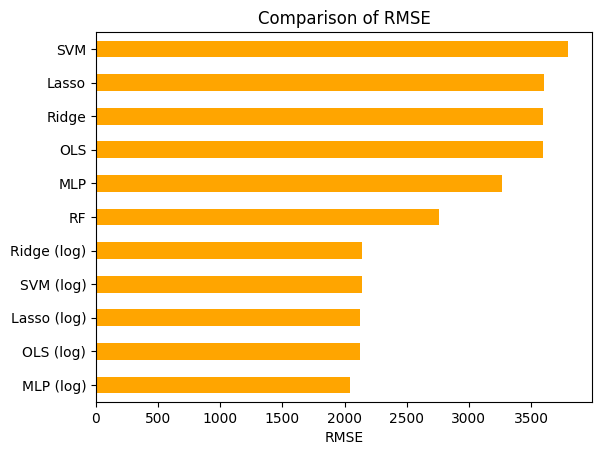

In [101]:
# Plot results
results.plot.barh(title='Comparison of RMSE', xlabel='RMSE', color='orange')